# AirFoil Model

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:

6. Scaled sound pressure level, in decibels.

# Importing the Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [5]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


# Graphing

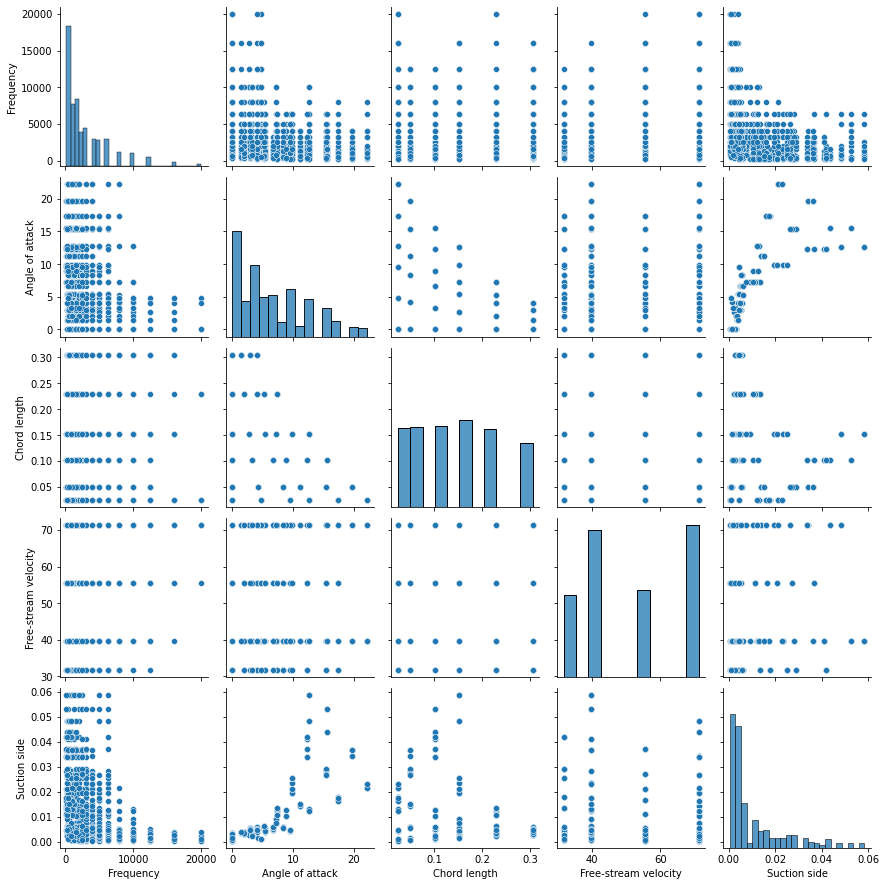

In [10]:
import seaborn as sns
sns.pairplot(X_train)

# Training and Testing Model

# Linear Regression

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-23.60452061163752


# Ridge Regression

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_score_)

-23.602891271038242


# Lasso Regression

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_score_)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9253.668682051843, tolerance: 3.811589243499876
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9713.090385502055, tolerance: 3.8427835972156523
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9339.910621950356, tolerance: 3.7589641618535996
  model = cd_fast.enet_coordinate_descent(
/L

-23.604520590618996


# Elastic Net

In [14]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

elasticNet = ElasticNet()
mse=cross_val_score(elasticNet,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-34.96917390903337


# Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

randomForest = RandomForestRegressor()
mse=cross_val_score(randomForest,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-4.504176956499475


In [16]:
lin_regressor.fit(X_train, y_train)
lasso_regressor.fit(X_train, y_train)
ridge_regressor.fit(X_train, y_train)
randomForest.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9253.668682051843, tolerance: 3.811589243499876
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9713.090385502055, tolerance: 3.8427835972156523
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9339.910621950356, tolerance: 3.7589641618535996
  model = cd_fast.enet_coordinate_descent(
/L

RandomForestRegressor()

In [17]:
prediction_linear = lin_regressor.predict(X_test)
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_random = randomForest.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

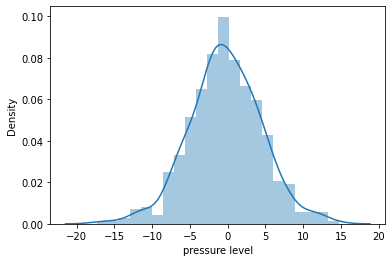

In [18]:
import seaborn as sns

sns.distplot(y_test-prediction_linear)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

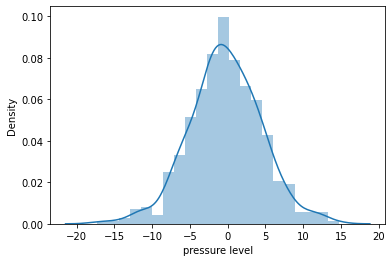

In [19]:
sns.distplot(y_test-prediction_lasso)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

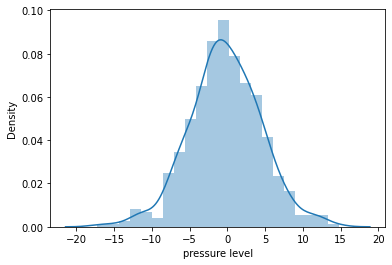

In [20]:
sns.distplot(y_test-prediction_ridge)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure level', ylabel='Density'>

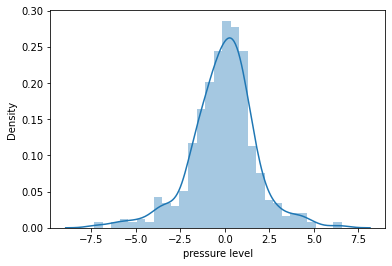

In [21]:
sns.distplot(y_test-prediction_random)

In [22]:
prediction_random

array([124.18175, 118.81591, 119.42756, 135.8006 , 134.24875, 123.29068,
       124.05185, 133.95814, 133.9763 , 127.84252, 126.74444, 112.78247,
       133.08954, 133.03515, 125.17612, 108.38787, 130.48635, 130.46091,
       128.58981, 123.67385, 124.81607, 127.1194 , 110.8679 , 125.94395,
       124.10024, 125.38504, 129.4307 , 131.45977, 109.25372, 130.58709,
       131.72069, 121.98239, 128.07079, 118.95559, 119.24584, 134.42836,
       133.85233, 130.05781, 121.27672, 111.99248, 125.28327, 134.98632,
       126.43069, 121.45909, 127.17264, 134.51681, 130.21875, 118.82252,
       121.36065, 133.46234, 132.35255, 114.41088, 129.59621, 127.43528,
       126.8329 , 120.78681, 123.46304, 129.52189, 122.3542 , 118.74523,
       126.00421, 134.34084, 130.35756, 133.32316, 117.45456, 125.04297,
       122.61776, 119.68134, 126.26858, 129.53258, 129.13596, 129.70599,
       128.53608, 116.99234, 129.47328, 127.91483, 130.64164, 132.6453 ,
       134.24562, 135.84723, 124.78511, 119.86064, 

# Finalised Random Forst

In [23]:
lin_regressor.score(X_test, y_test)

0.5124474986138421

In [24]:
randomForest.score(X_test, y_test)

0.9276017963700254

In [25]:
ridge_regressor.score(X_test, y_test)

-22.952089824401856

In [26]:
lasso_regressor.score(X_test, y_test)

-22.954669378280087

# Saving and Loading the Model

In [30]:
import pickle
pickle.dump(randomForest, open('model.pkl', 'wb'))

In [31]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.score(X_test, y_test)

0.9276017963700254